In [15]:
import pandas as pd
import glob

# List of file names corresponding to the stocks
file_names = ["AAPL_historical_data.csv", "AMZN_historical_data.csv", "GOOG_historical_data.csv",
              "META_historical_data.csv", "MSFT_historical_data.csv", "NVDA_historical_data.csv",
              "TSLA_historical_data.csv"]

# Initialize an empty dictionary to store DataFrames
stock_data = {}

# Load each file into a DataFrame and store in the dictionary
for file_name in file_names:
    # Extract stock symbol from the file name (e.g., "AAPL" from "AAPL_historical_data.csv")
    stock_symbol = file_name.split("_")[0]

    # Load the CSV file
    df = pd.read_csv("/content/drive/MyDrive/Week 1 Kifiya/datasets/yfinance_data/" + file_name)

    # Convert the Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Set the Date column as the index
    df.set_index('Date', inplace=True)

    # Store the DataFrame in the dictionary
    stock_data[stock_symbol] = df

# Check the dictionary keys to verify the stocks loaded
print(stock_data.keys())


dict_keys(['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA'])


In [18]:
# Initialize an empty list to store modified DataFrames
df_list = []

for stock_symbol, df in stock_data.items():
    # Add a column to indicate the stock symbol
    df['Stock'] = stock_symbol

    # Append the DataFrame to the list
    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(df_list)

# Display the first few rows of the merged DataFrame
merged_df.head()


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock
Date,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL


In [19]:
# Example: Filter data for Apple (AAPL)
aapl_data = merged_df[merged_df['Stock'] == 'AAPL']

# Example: Display the merged DataFrame
print(merged_df.head())


                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits Stock  
Date                                       
1980-12-12        0.0           0.0  AAPL  
1980-12-15        0.0           0.0  AAPL  
1980-12-16        0.0           0.0  AAPL  
1980-12-17        0.0           0.0  AAPL  
1980-12-18        0.0           0.0  AAPL  


In [20]:
import talib as ta
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store the indicators
indicators = {}

# Compute indicators for each stock in the merged DataFrame
for stock_symbol in merged_df['Stock'].unique():
    stock_df = merged_df[merged_df['Stock'] == stock_symbol].copy()  # Use .copy() to avoid modifying the slice

    # Moving Averages
    stock_df.loc[:, 'SMA_10'] = ta.SMA(stock_df['Close'], timeperiod=10)
    stock_df.loc[:, 'SMA_20'] = ta.SMA(stock_df['Close'], timeperiod=20)

    # RSI (Relative Strength Index)
    stock_df.loc[:, 'RSI'] = ta.RSI(stock_df['Close'], timeperiod=14)

    # MACD (Moving Average Convergence Divergence)
    stock_df.loc[:, 'MACD'], stock_df.loc[:, 'MACD_Signal'], stock_df.loc[:, 'MACD_Hist'] = ta.MACD(
        stock_df['Close'],
        fastperiod=12,
        slowperiod=26,
        signalperiod=9
    )

    # Store the calculated indicators back to the dictionary
    indicators[stock_symbol] = stock_df

# Example: Display the indicators for AAPL
indicators['AAPL'].tail()


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock,SMA_10,SMA_20,RSI,MACD,MACD_Signal,MACD_Hist
Date,,,,,,,,,,,,,,,
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,AAPL,227.220999,224.228500,48.687742,4.662717,6.678882,-2.016164
2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,AAPL,226.212999,224.440500,47.386437,3.748082,6.092722,-2.344640
2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,AAPL,224.955000,224.633500,48.055700,3.026267,5.479431,-2.453164
2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,AAPL,223.339001,225.014500,48.476184,2.448591,4.873263,-2.424672
2024-07-30,219.190002,220.330002,216.119995,218.800003,218.547043,41643800,0.0,0.0,AAPL,221.737001,225.117001,49.359115,2.012764,4.301163,-2.288399


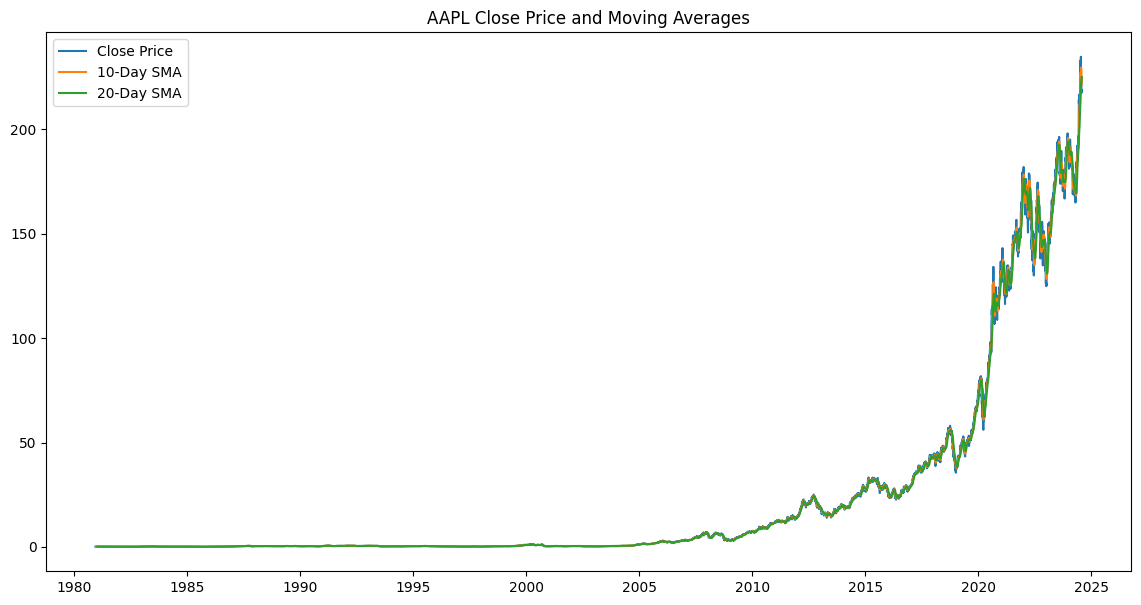

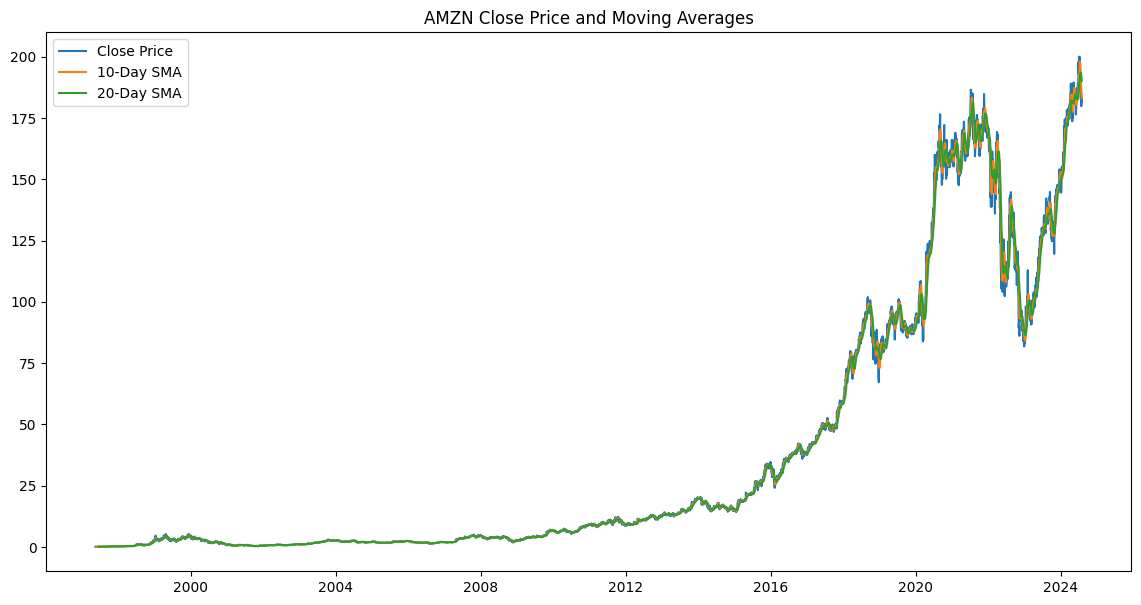

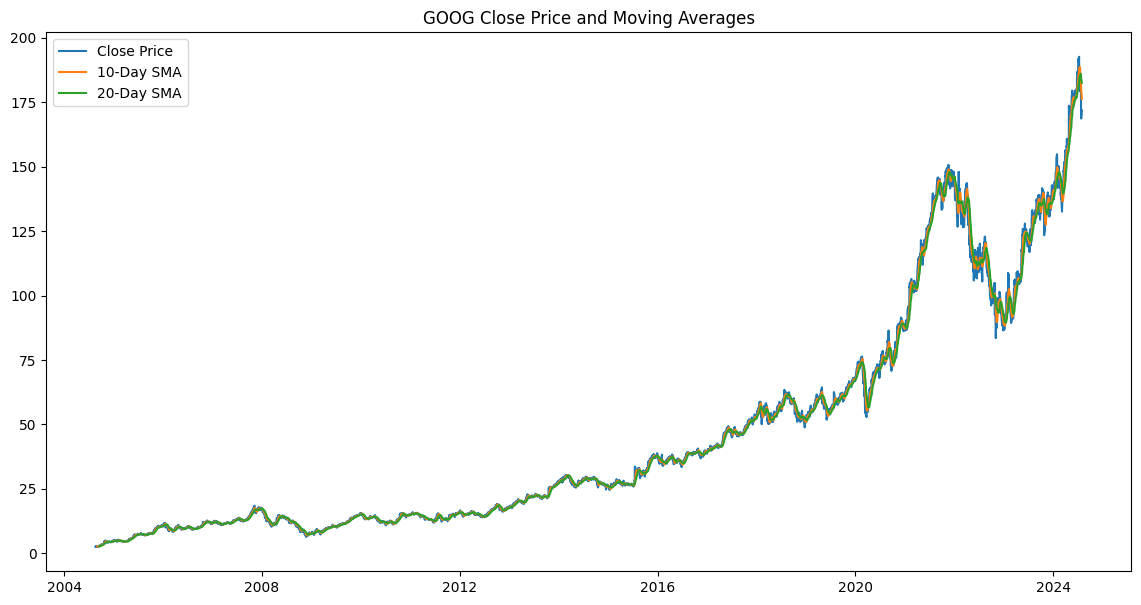

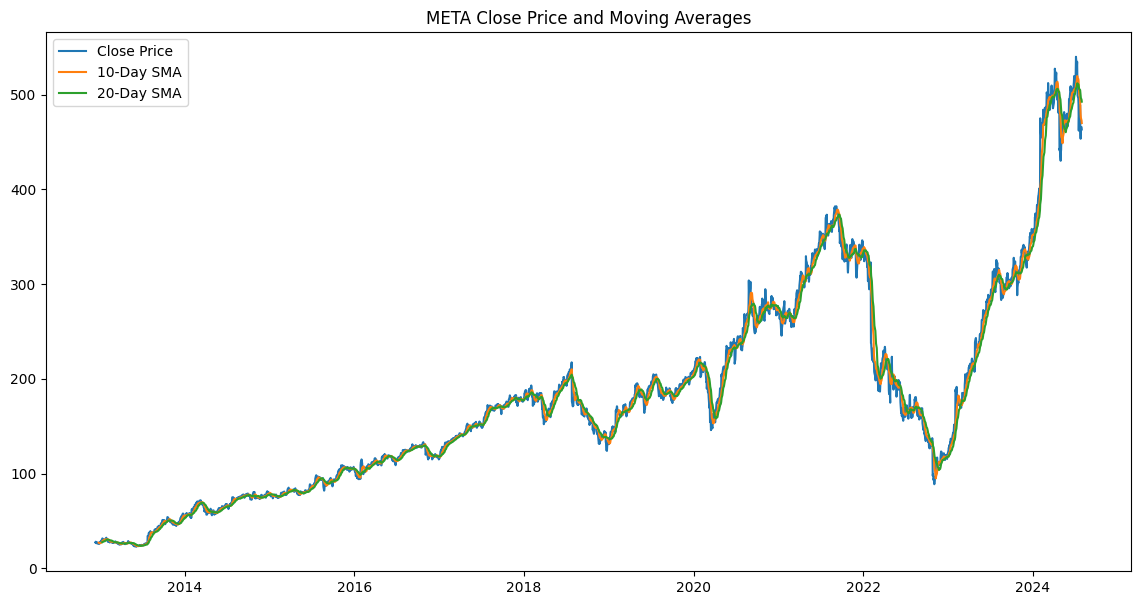

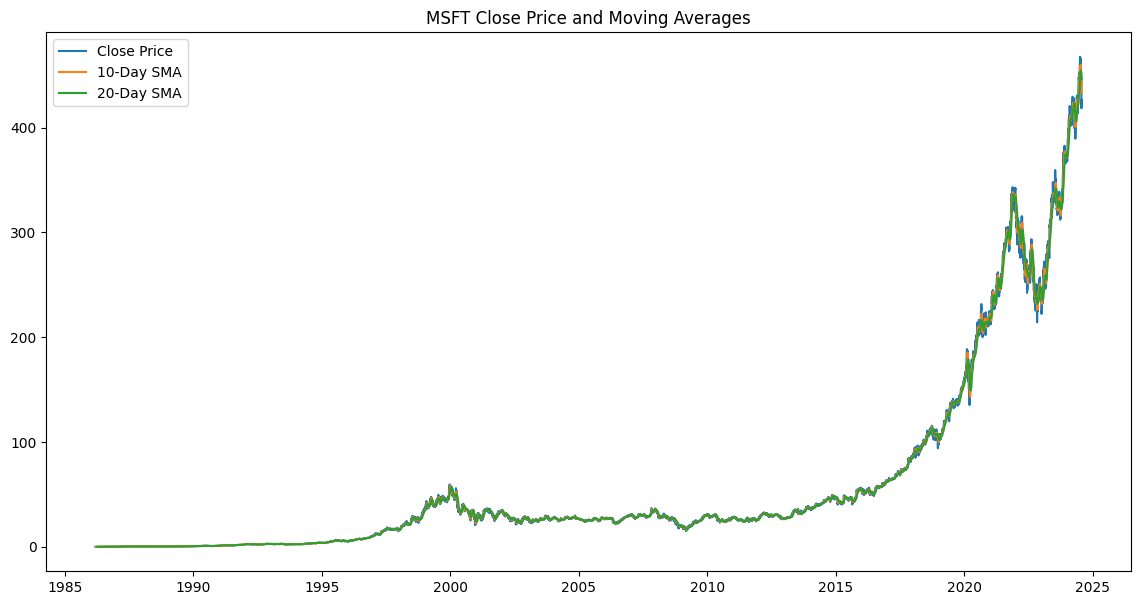

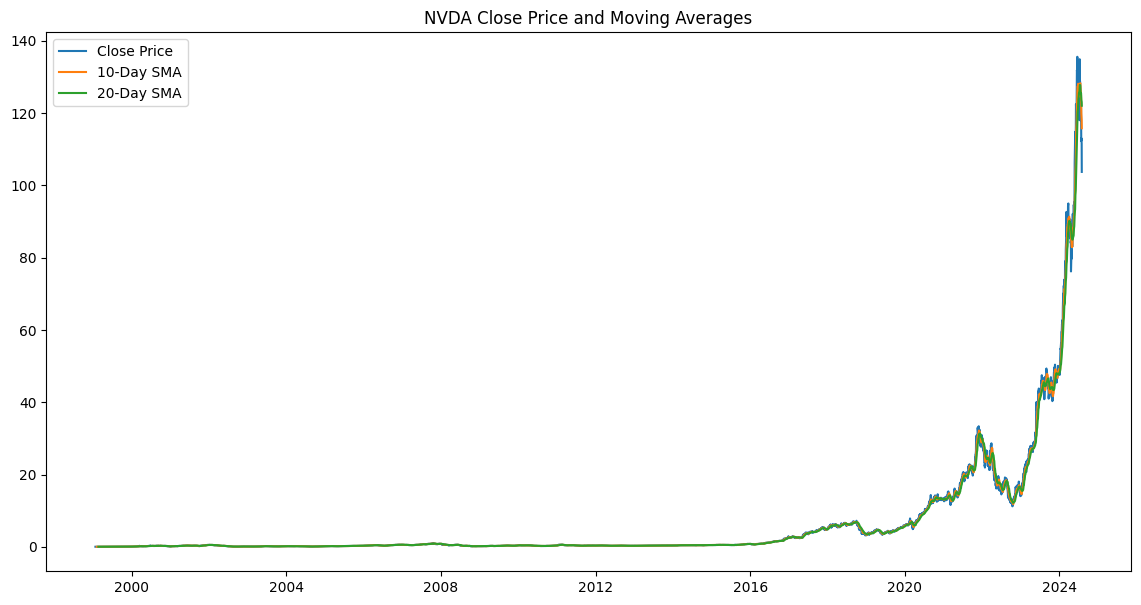

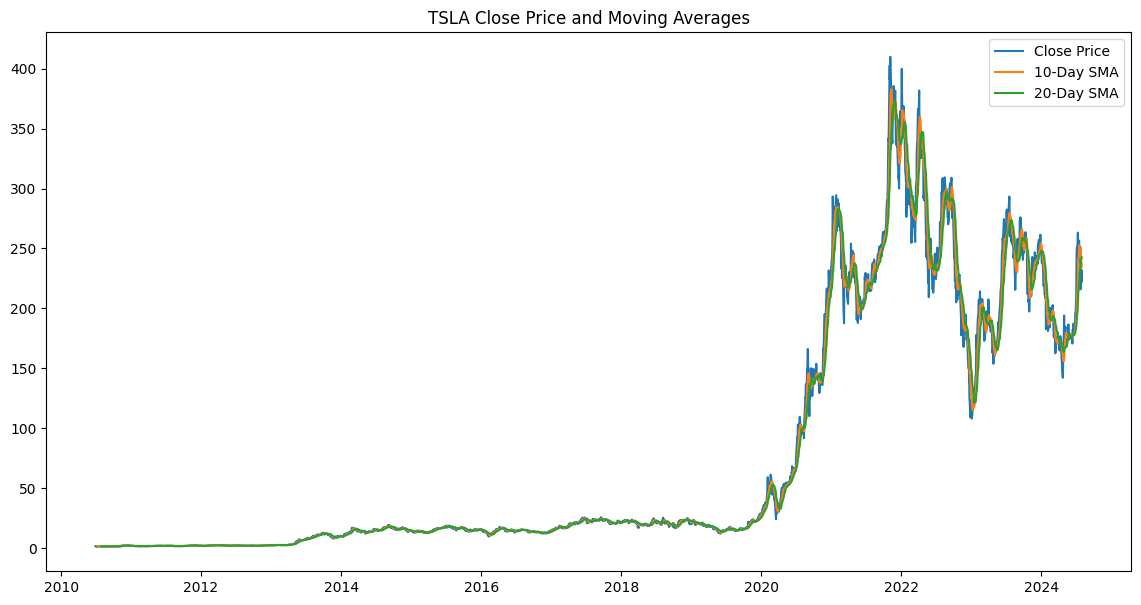

In [25]:
# Loop through each stock symbol in the indicators dictionary
for stock_symbol in indicators.keys():
    plt.figure(figsize=(14, 7))

    # Plot the Close price and the moving averages
    plt.plot(indicators[stock_symbol].index, indicators[stock_symbol]['Close'], label='Close Price')
    plt.plot(indicators[stock_symbol].index, indicators[stock_symbol]['SMA_10'], label='10-Day SMA')
    plt.plot(indicators[stock_symbol].index, indicators[stock_symbol]['SMA_20'], label='20-Day SMA')

    # Add title and legend
    plt.title(f'{stock_symbol} Close Price and Moving Averages')
    plt.legend()

    # Display the plot
    plt.show()

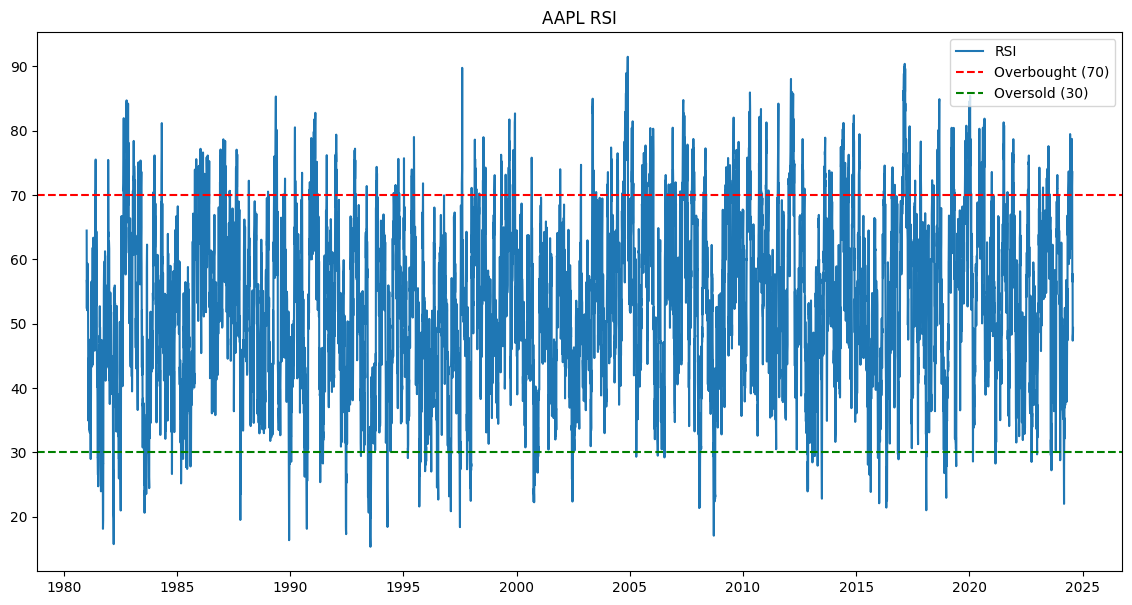

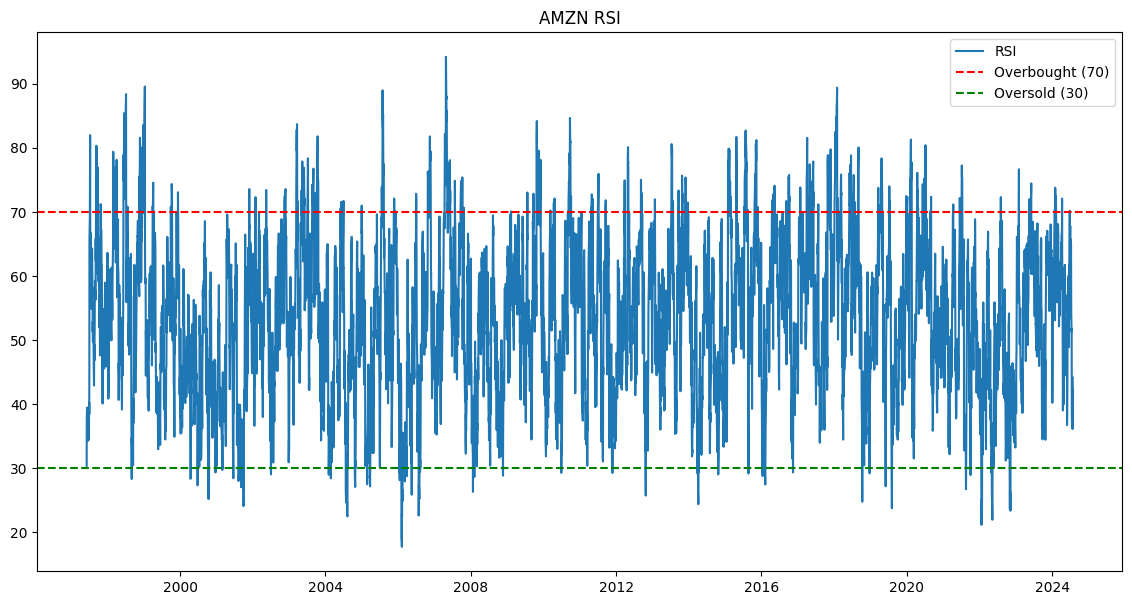

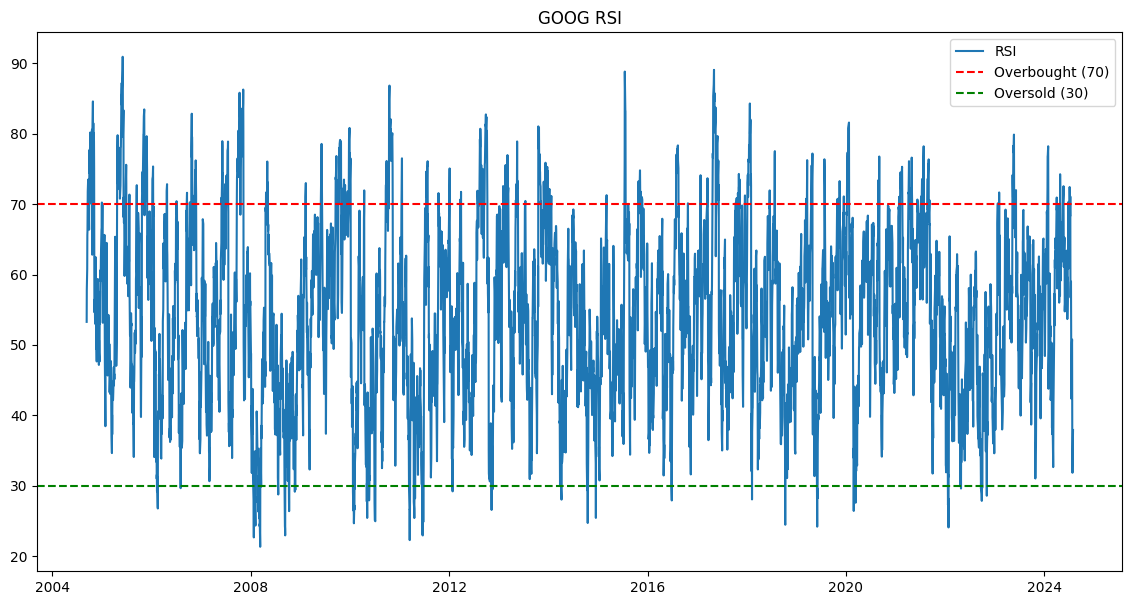

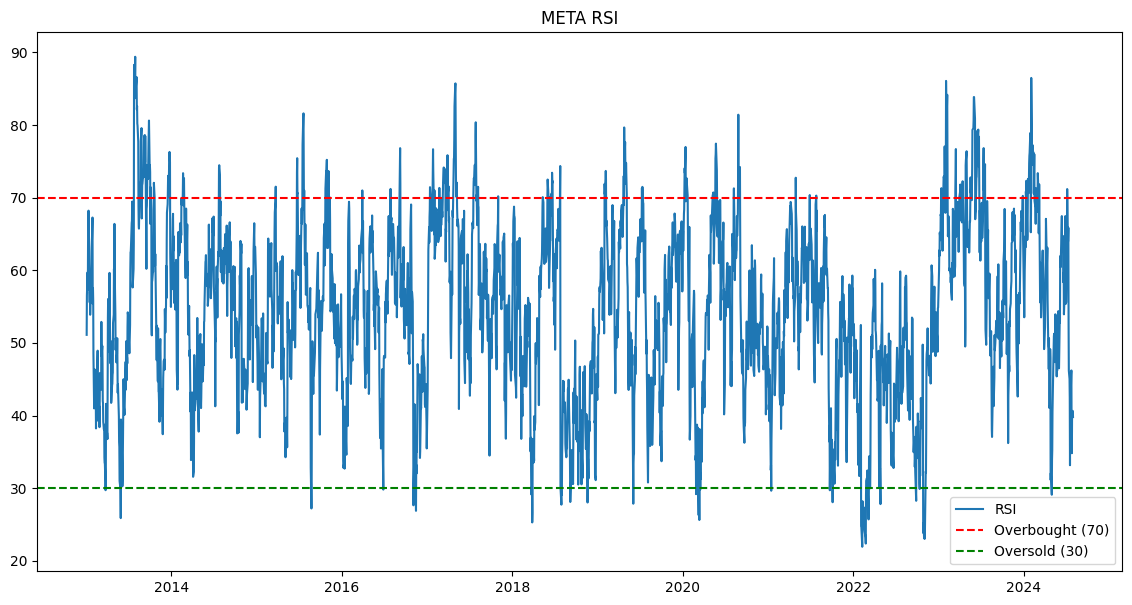

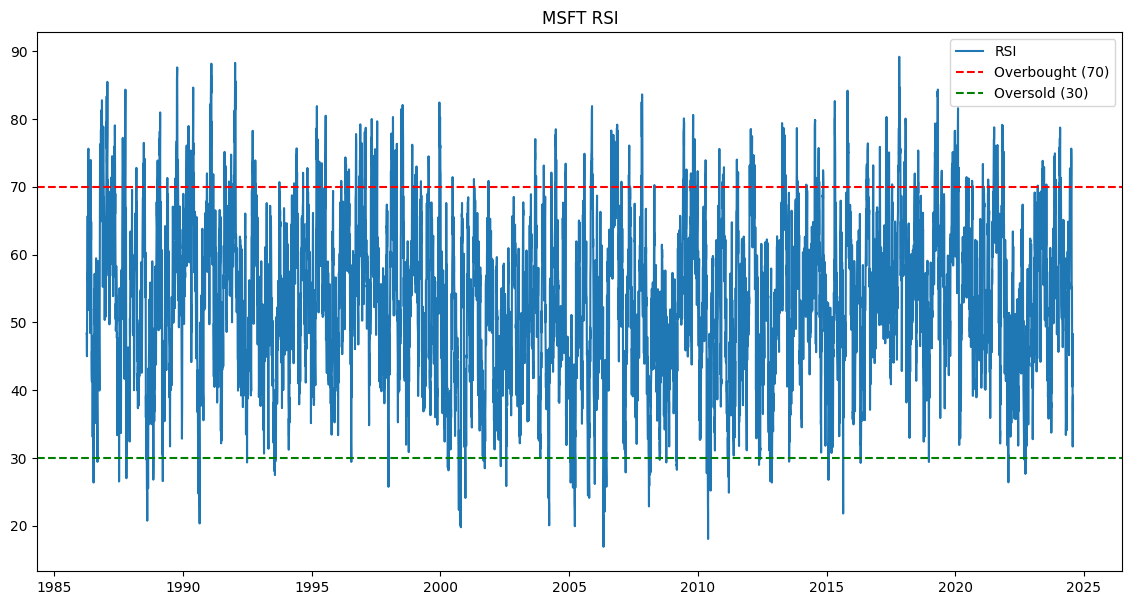

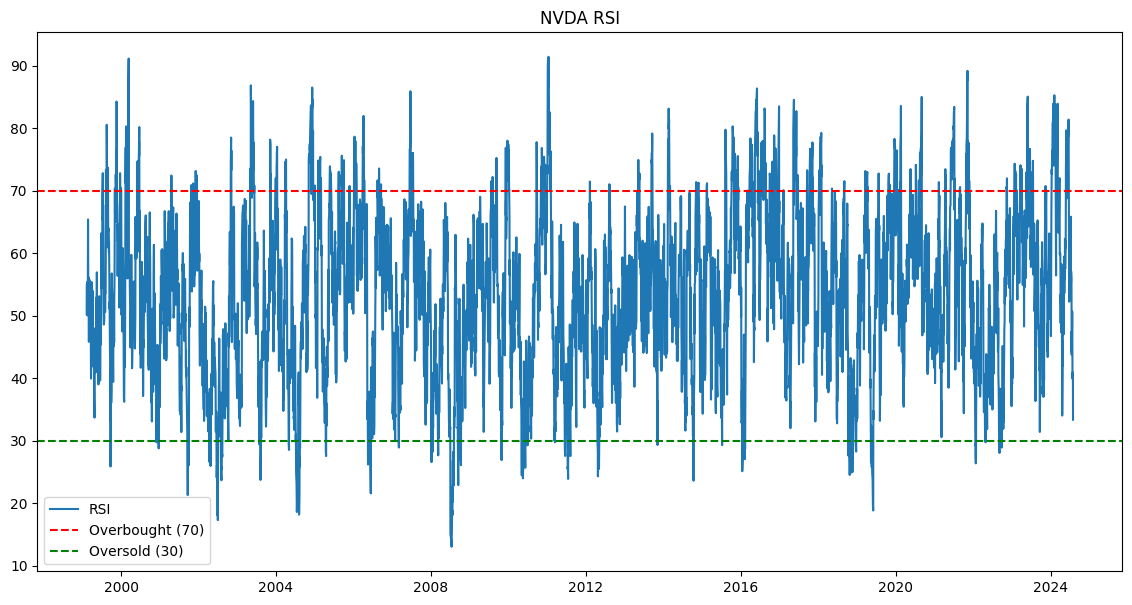

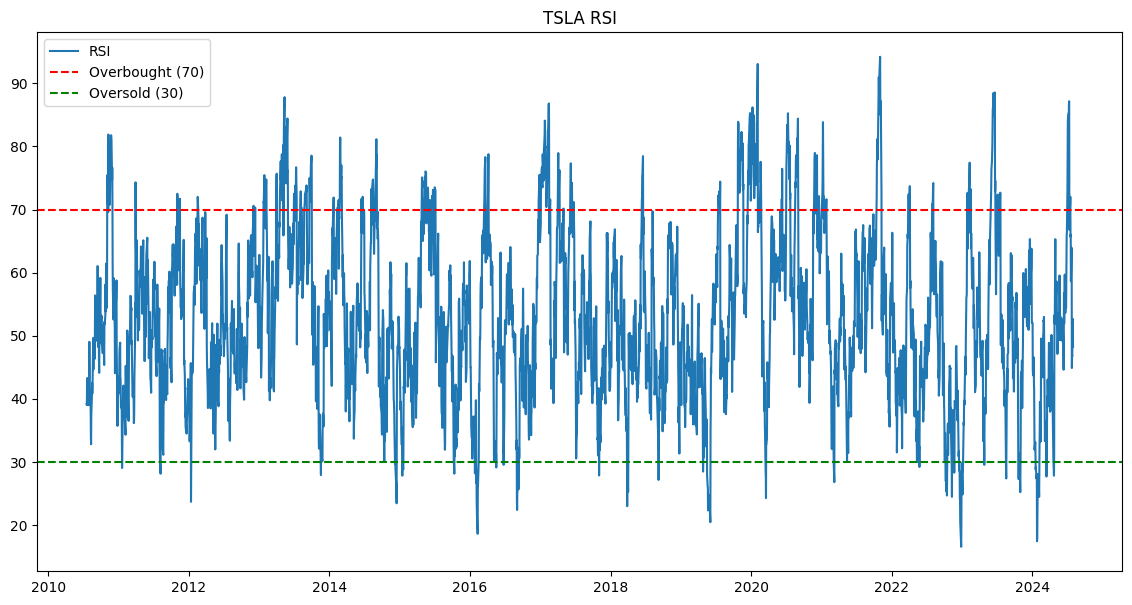

In [26]:
# Loop through each stock symbol in the indicators dictionary
for stock_symbol in indicators.keys():
    plt.figure(figsize=(14, 7))

    # Plot the RSI
    plt.plot(indicators[stock_symbol].index, indicators[stock_symbol]['RSI'], label='RSI')

    # Add horizontal lines for overbought and oversold levels
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

    # Add title and legend
    plt.title(f'{stock_symbol} RSI')
    plt.legend()

    # Display the plot
    plt.show()

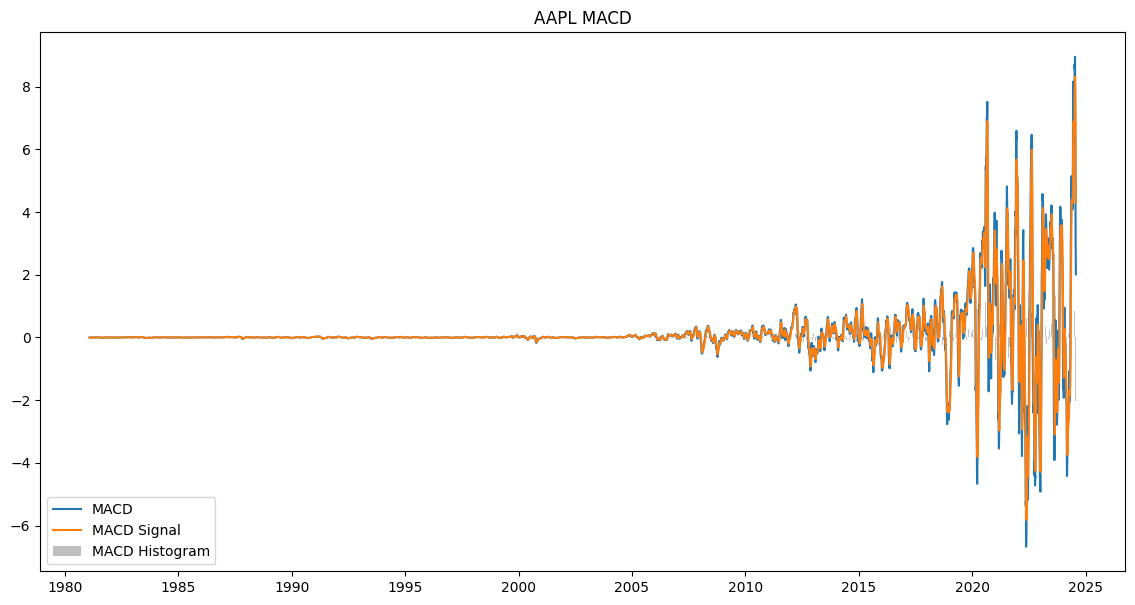

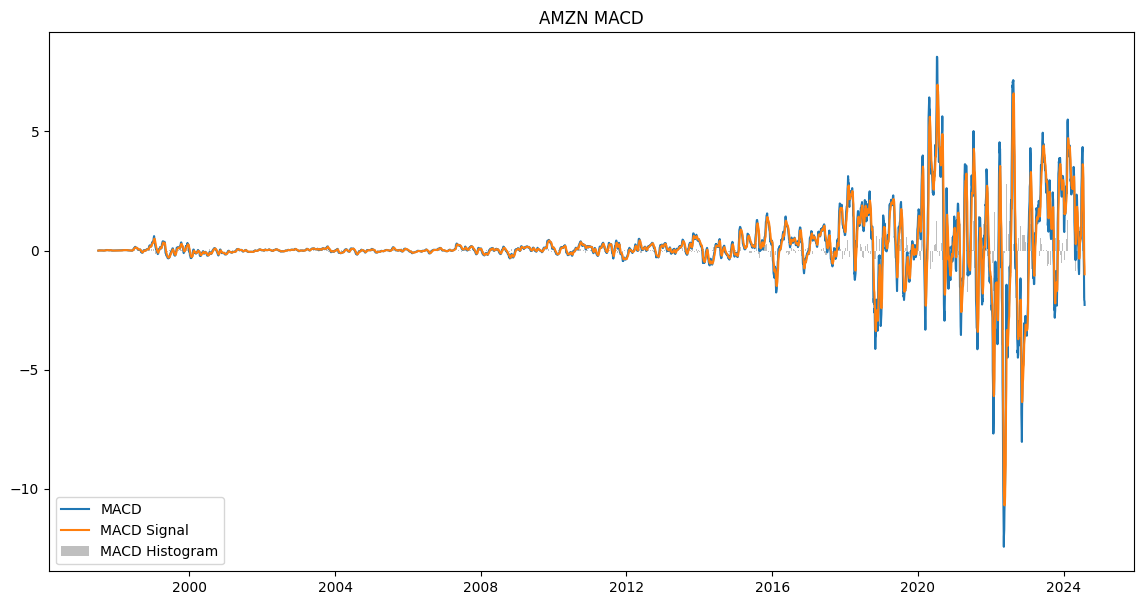

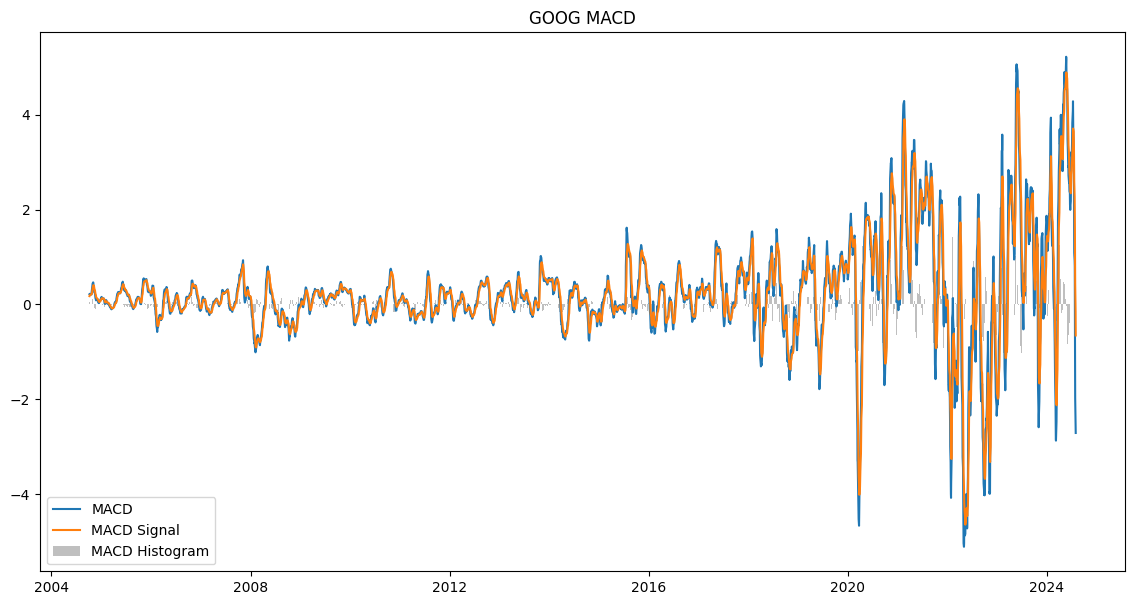

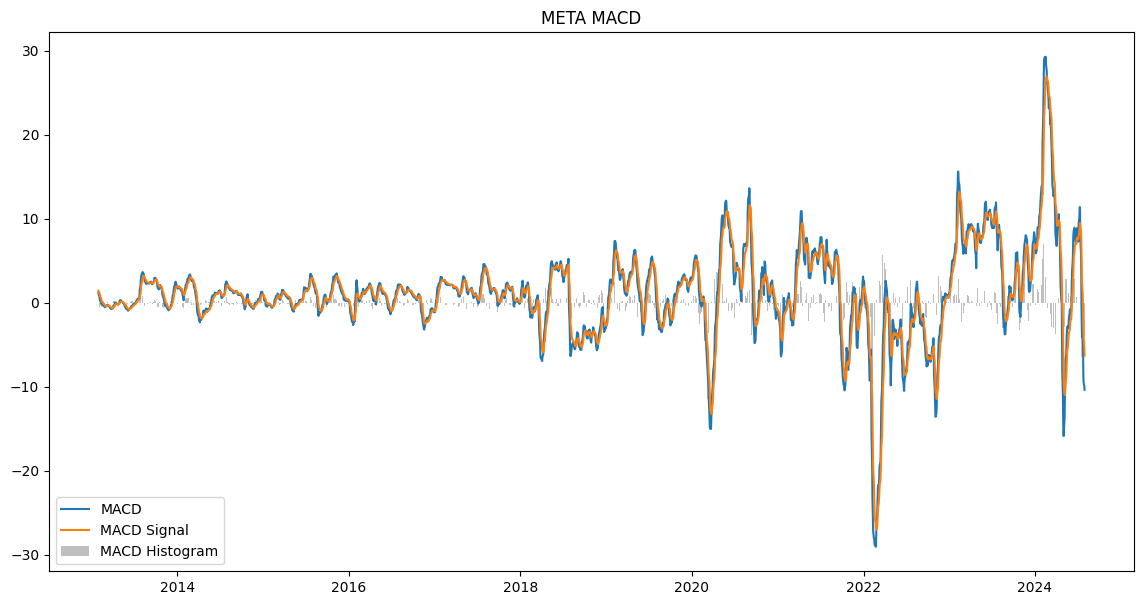

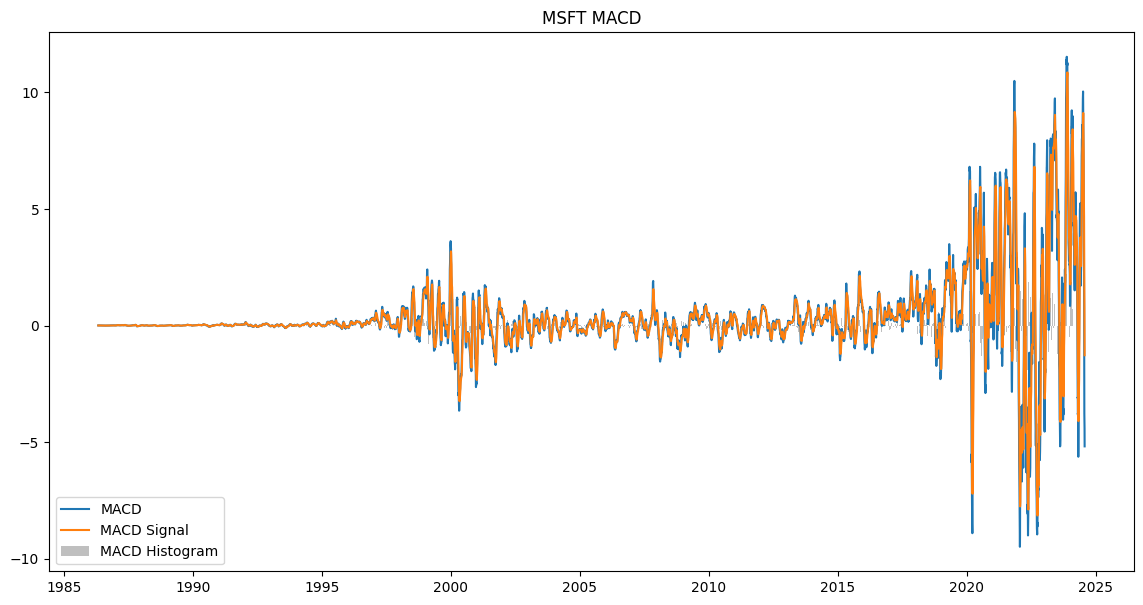

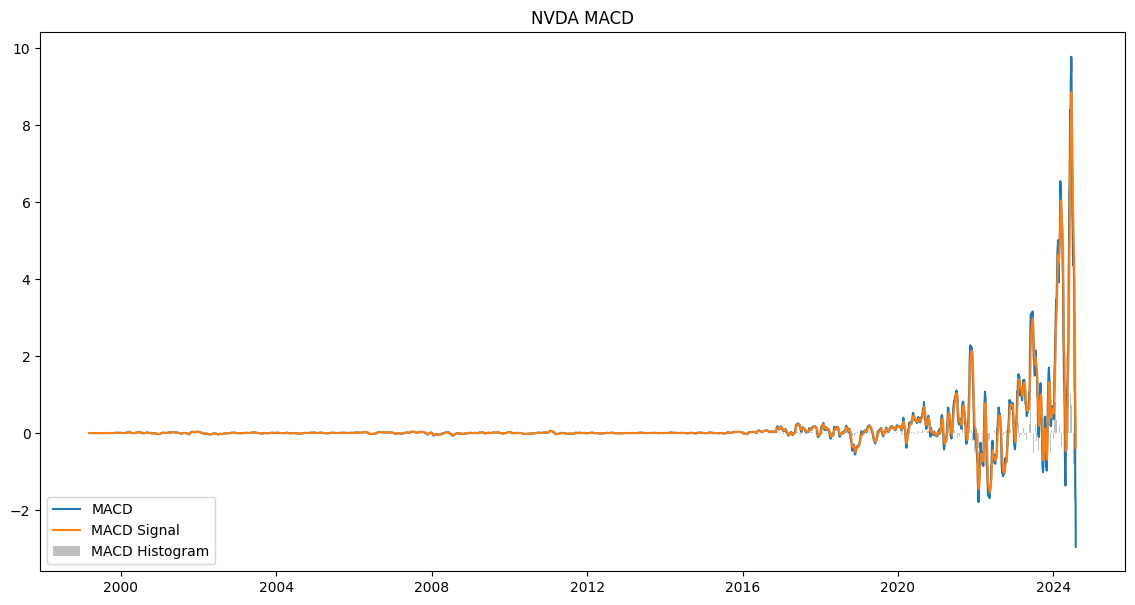

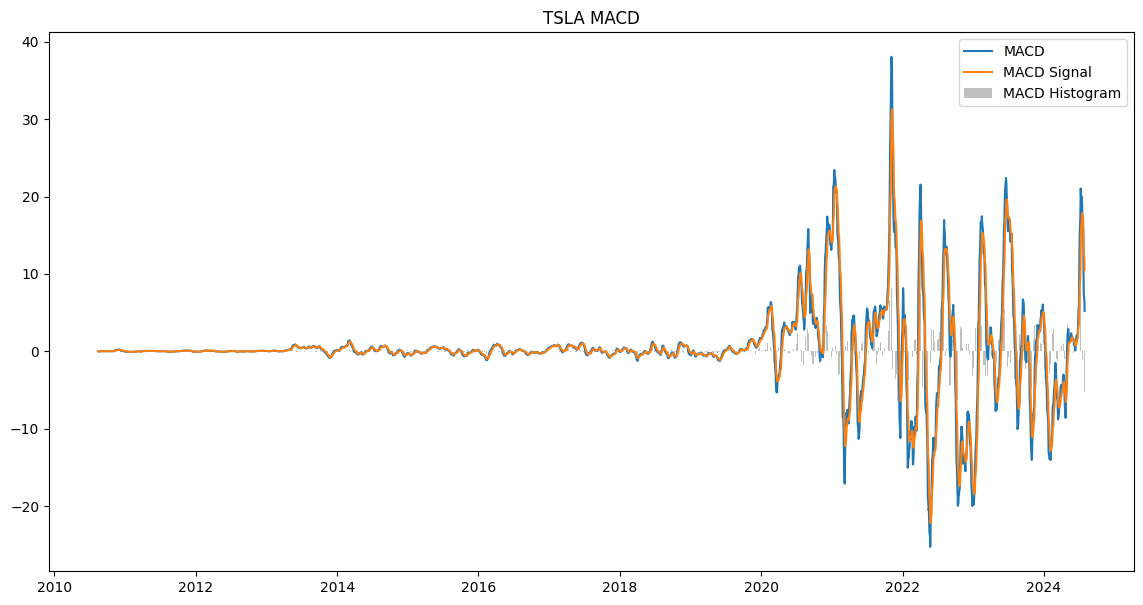

In [27]:
# Loop through each stock symbol in the indicators dictionary
for stock_symbol in indicators.keys():
    plt.figure(figsize=(14, 7))

    # Plot the MACD line
    plt.plot(indicators[stock_symbol].index, indicators[stock_symbol]['MACD'], label='MACD')

    # Plot the MACD Signal line
    plt.plot(indicators[stock_symbol].index, indicators[stock_symbol]['MACD_Signal'], label='MACD Signal')

    # Plot the MACD Histogram as bars
    plt.bar(indicators[stock_symbol].index, indicators[stock_symbol]['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.5)

    # Add title and legend
    plt.title(f'{stock_symbol} MACD')
    plt.legend()

    # Display the plot
    plt.show()